torchvision.models ofrece una gran cantidad de modelos de la literatura de deep learning que pueden utilizarse de forma directa.

Por defecto, cuando se carga un modelo de models, los pesos son aleatorios. Es decir que cargamos una arquitectura que no está entrenada. En cambio si indicamos una de las opciones posibles para el argumento weights en el constructor del modelo, se descargará un modelo entrenado.

A continuación veremos algunos ejemplos de modelos para clasificar, localizar y segmentar.

**Modelo para clasificar imágenes**

torchvision tiene una basta cantidad de modelos para clasificar incluyendo distintas versiones de VGG, ResNet, AlexNet, GoogLeNet, DenseNet, entre otros.

A continuación se carga un modelo resnet18 pre-entrenado con el famoso dataset ImageNet.

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from torchvision import models

model = models.resnet18(weights=models.resnet.ResNet18_Weights.IMAGENET1K_V1)
model.eval();

Los modelos pre-entrenados esperan imágenes con

* tres canales (RGB)

* al menos 224x224 píxeles

* píxeles entre 0 y 1 (float)

Además los canales deben estar normalizados según:

In [11]:
import torchvision
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])

Preparamos una imagen para inferir su clase con Resnet18.

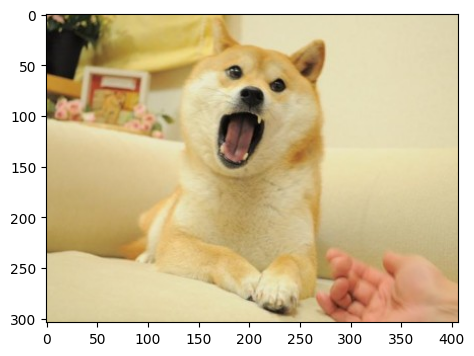

In [12]:
from PIL import Image

img = Image.open("dog.jpg")

fig, ax = plt.subplots(figsize=(6, 4))
ax.imshow(img);

Si la normalizamos según la transformación anterior se obtiene:

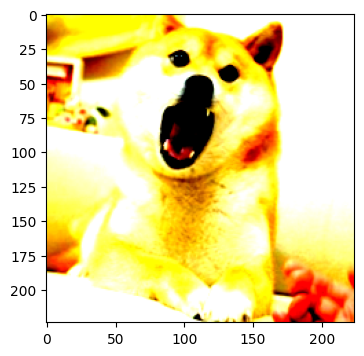

In [13]:
import torch
from torchvision import transforms

TL_transform = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                                        std=(0.229, 0.224, 0.225))])
normalized_img = TL_transform(img)

fig, ax = plt.subplots(figsize=(6, 4))

ax.imshow(normalized_img.permute(dims=[1, 2, 0]).detach().numpy());

Luego podemos evaluar el modelo con la nueva imagen:

In [14]:
import torch.nn as nn

probs = nn.Softmax(dim=1)(model.forward(normalized_img.unsqueeze(0)))

Este modelo tiene


In [15]:
len(probs[0, :])

1000

neuronas de salida (clases). Estudiemos las cinco clases más probables según el modelo:

In [16]:
import urllib.request, json
with urllib.request.urlopen("https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json") as url:
    labels = json.load(url)

best = probs.argsort(descending=True)

print("idx prob name")
for entity in best[0, :5].numpy():
    print(entity, probs[0, entity].detach(), labels[str(entity)][1])

idx prob name
151 tensor(0.2706) Chihuahua
259 tensor(0.1793) Pomeranian
263 tensor(0.1587) Pembroke
260 tensor(0.1288) chow
273 tensor(0.1261) dingo
